In [5]:
import pandas as pd
import numpy as np
import streamlit as st #can incorporate streamlit last, first use matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans, AgglomerativeClustering

In [107]:
df = pd.read_csv('new_cleaned_dataset.csv').drop('Unnamed: 0',axis=1).dropna()
df

,index,hand_num,big_blind,player,pos,bankroll,preflop_equity,preflop_rank,preflop_action,preflop_pot,...,turn_action,turn_pot,river_equity,river_action,river_pot,earnings,num_players,pocket_cards,aggression_factor,vpip
0,0,192,10,gunner,9,785,0.559,91.0,['c'],10.000000,...,['c'],20.0,1.0,['b'],20.0,60,2,"['8h', 'Ad']",0.250000,50.0
1,0,192,10,sagerbot,1,1740,0.402,35.0,"['B', 'k']",10.000000,...,['b'],20.0,0.0,"['k', 'c']",20.0,-60,2,"['Qd', 'Jc']",0.400000,50.0
2,1,193,10,Winner777,3,1255,0.661,42.0,['r'],23.333333,...,['b'],20.0,1.0,"['b', 'c']",40.0,120,2,"['Td', 'Ac']",0.800000,110.0
3,1,193,10,shinner,6,855,0.230,91.0,['c'],23.333333,...,['c'],20.0,0.0,['r'],40.0,-90,2,"['As', '8d']",0.250000,80.0
4,2,194,20,deadhead,6,1000,0.891,3.0,['r'],25.000000,...,['b'],20.0,1.0,['b'],20.0,80,2,"['Qd', 'Qc']",1.000000,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360467,277592,31197,20,num,1,1785,0.547,36.0,"['B', 'r', 'c']",30.000000,...,"['k', 'c']",20.0,0.0,"['k', 'c']",20.0,-70,2,"['6d', '6h']",0.142857,50.0
360476,277599,31204,10,kman,1,21426,0.261,45.0,"['B', 'c']",20.000000,...,['k'],0.0,0.0,"['b', 'c']",40.0,-70,2,"['Ts', 'Kd']",0.166667,60.0
360477,277599,31204,10,num,3,1760,0.690,20.0,['r'],20.000000,...,['k'],0.0,1.0,['r'],40.0,90,2,"['Kh', 'Qc']",0.750000,80.0
360482,277602,31207,10,kman,1,21356,0.624,19.0,"['B', 'c']",10.000000,...,['k'],0.0,1.0,['b'],20.0,40,2,"['Ah', '9h']",0.500000,30.0


In [108]:
df = df[df['aggression_factor'] >= 0]
#df = df[df['num_players'] > 3]
x = df[['river_equity']]
y = df['earnings']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

model1 = LinearRegression()
model1.fit(x_train,y_train).score(x_test,y_test)

#vpip statistics still contain errors

0.5984824390607937

In [109]:
df.dropna().shape

(226167, 24)

In [110]:
filtered_df = df.dropna().groupby('player').filter(lambda x:x['player'].count()>30)
filtered_df = filtered_df.groupby('player').mean()

C:\Users\AZhang\AppData\Local\Temp\ipykernel_1308\3672907680.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_df = filtered_df.groupby('player').mean()


In [111]:
feature_df = filtered_df[['aggression_factor','preflop_rank']]
feature_df

,aggression_factor,preflop_rank
player,,
A8,0.354748,64.395604
ABigLoser,0.473810,66.800000
ACC,0.488638,60.395000
ACESUP,0.334807,50.888587
AIYAH,0.385842,63.696721
...,...,...
y,0.126452,59.158333
zippy,0.263819,71.804124
zorbucks,0.274220,55.934652


In [112]:
X_1 = preprocessing.StandardScaler().fit(feature_df).transform(feature_df)

kmeans1 = KMeans(n_clusters=4,n_init=20)
clust_1 = kmeans1.fit(X_1)
feature_df['clusters'] = clust_1.labels_
feature_df

C:\Users\AZhang\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\AZhang\AppData\Local\Temp\ipykernel_1308\2926679624.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['clusters'] = clust_1.labels_


,aggression_factor,preflop_rank,clusters
player,,,
A8,0.354748,64.395604,3
ABigLoser,0.473810,66.800000,3
ACC,0.488638,60.395000,3
ACESUP,0.334807,50.888587,3
AIYAH,0.385842,63.696721,3
...,...,...,...
y,0.126452,59.158333,2
zippy,0.263819,71.804124,0
zorbucks,0.274220,55.934652,2


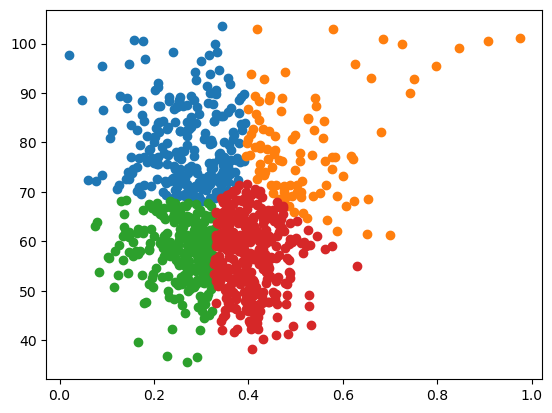

In [113]:
for i in range(0,4):
    plt.scatter(feature_df.loc[feature_df['clusters'] == i, 'aggression_factor'],feature_df.loc[feature_df['clusters'] == i, 'preflop_rank'])

In [115]:
from sklearn.linear_model import LinearRegression
    
#encode dummies

x = pd.get_dummies(feature_df['clusters']).iloc[:,1].array.reshape(-1,1)
y = filtered_df['earnings']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

linreg = LinearRegression()
linreg.fit(x_train,y_train).score(x_test,y_test)

0.10398244567629933

In [122]:
x = filtered_df[['pos']]
y = filtered_df['preflop_rank']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

linreg = LinearRegression()
linreg.fit(x_train,y_train).score(x_test,y_test)

0.02808974511013651

In [123]:
filtered_df

,index,hand_num,big_blind,pos,bankroll,preflop_equity,preflop_rank,preflop_pot,flop_equity,flop_pot,turn_equity,turn_pot,river_equity,river_pot,earnings,num_players,aggression_factor,vpip
player,,,,,,,,,,,,,,,,,,
A8,123633.985871,14990.637363,14.160126,2.690738,4573.056515,0.449154,64.395604,20.172554,0.468613,11.263736,0.491595,17.311355,0.483516,15.656724,19.259027,2.172684,0.354748,61.231816
ABigLoser,67940.285714,14575.257143,14.285714,2.771429,828.000000,0.475657,66.800000,22.166667,0.405850,11.428571,0.442468,18.285714,0.400000,21.142857,-14.571429,2.114286,0.473810,63.571429
ACC,72677.285000,19951.380000,15.300000,3.810000,2559.905000,0.439385,60.395000,21.020655,0.427215,13.979167,0.425415,23.750000,0.430000,17.883333,13.240000,2.200000,0.488638,75.775000
ACESUP,55127.396739,15392.255435,14.375000,4.277174,1417.703804,0.464492,50.888587,17.603617,0.509278,12.575634,0.535025,19.760417,0.554348,15.906703,40.165761,2.266304,0.334807,79.182065
AIYAH,171959.807377,8713.586066,14.754098,2.758197,955.954918,0.462680,63.696721,21.984973,0.437727,12.663934,0.433454,21.578552,0.426230,17.926230,6.897541,2.151639,0.385842,66.225410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
y,253472.891667,11011.325000,13.750000,4.575000,1510.566667,0.407342,59.158333,17.604861,0.417808,7.750000,0.451654,19.250000,0.441667,16.825000,42.075000,2.525000,0.126452,74.983333
zippy,206781.123711,14934.319588,12.989691,3.639175,1326.587629,0.403722,71.804124,18.322165,0.387654,11.958763,0.391625,20.879725,0.329897,22.680412,5.134021,2.391753,0.263819,71.927835
zorbucks,205014.468616,11949.690456,14.024076,3.433362,2137.097163,0.455138,55.934652,18.439325,0.459458,11.081255,0.450572,19.551591,0.437661,15.349097,17.538263,2.267412,0.274220,66.761823
